In [121]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [122]:
data=pd.read_csv(r"C:\Users\DELL\Downloads\insurance.csv")

In [123]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [124]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [125]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [126]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

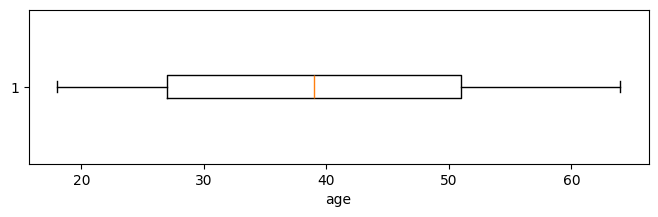

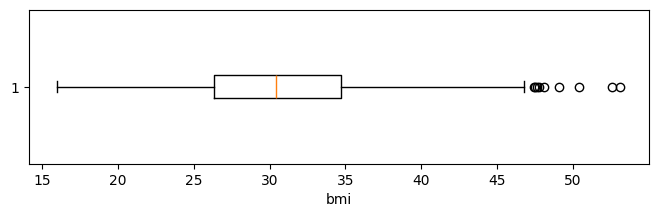

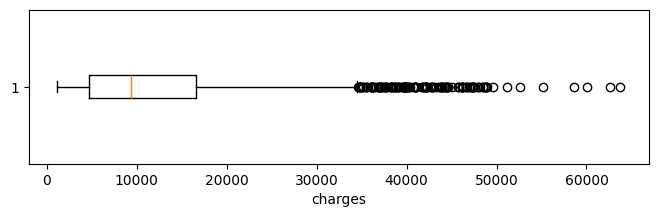

In [127]:
for i in ["age", "bmi", "charges"]:
    plt.figure(figsize=(8, 2))
    plt.boxplot(data[i], vert=False)
    plt.xlabel(i)
    plt.show()

MODEL1 LINEAR REGRESSION

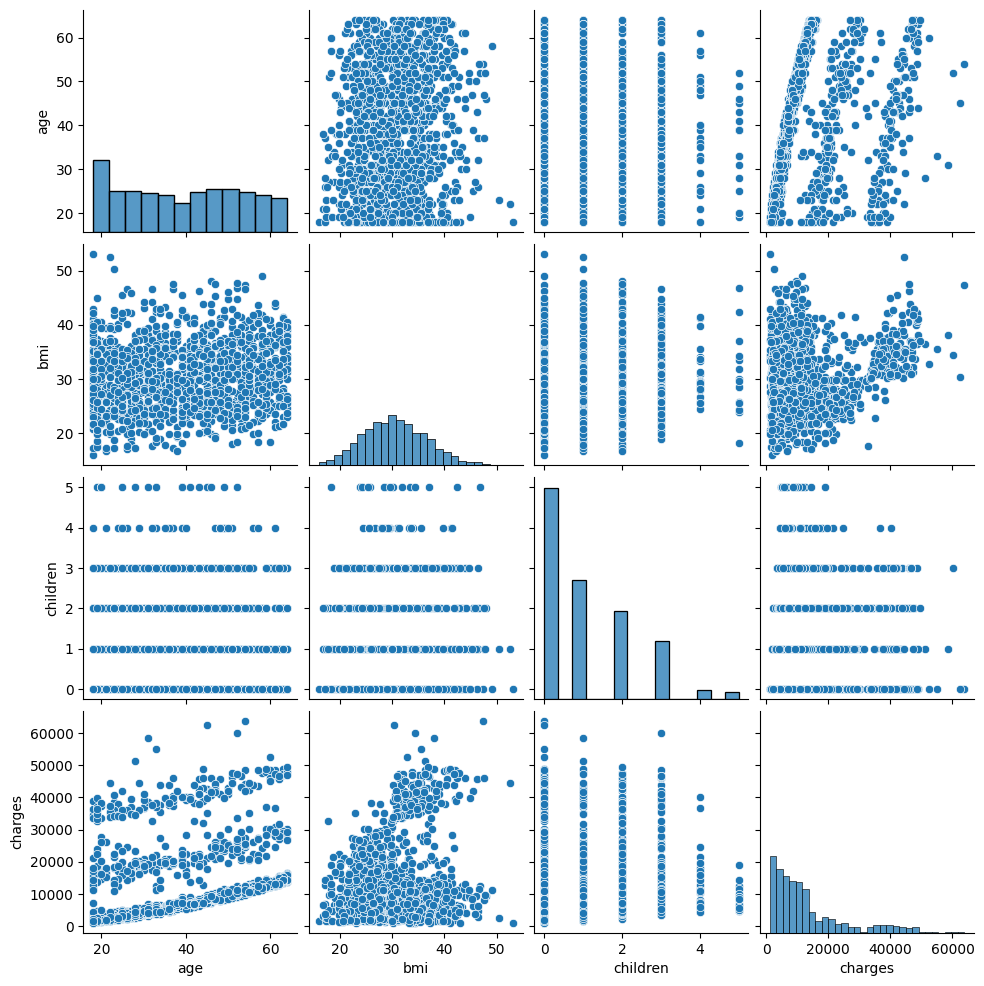

In [128]:
sns.pairplot(data)
plt.show()

In [129]:
data = pd.get_dummies(data, drop_first=True)

In [130]:
data.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


In [131]:
scaler = StandardScaler()
data[['age', 'bmi', 'children', 'charges']] = scaler.fit_transform(data[['age', 'bmi', 'children', 'charges']])



In [132]:
data.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,-0.908614,0.298584,False,True,False,False,True
1,-1.509965,0.509621,-0.078767,-0.953689,True,False,False,True,False
2,-0.797954,0.383307,1.580926,-0.728675,True,False,False,True,False
3,-0.441948,-1.305531,-0.908614,0.719843,True,False,True,False,False
4,-0.513149,-0.292556,-0.908614,-0.776802,True,False,True,False,False


In [133]:
X= data.drop('charges', axis=1)
y= data['charges']

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [135]:
X_train.shape

(1070, 8)

In [136]:
X_test.shape

(268, 8)

In [137]:
y_test.shape

(268,)

In [138]:
y_train.shape

(1070,)

In [139]:
model=LinearRegression()

In [140]:
model.fit(X_train,y_train)

LinearRegression()

In [141]:
c=model.intercept_

In [142]:
m=model.coef_

In [143]:
m,c

(array([ 2.98141630e-01,  1.69748264e-01,  4.23344352e-02, -1.53580725e-03,
         1.95375310e+00, -3.06206093e-02, -5.43443156e-02, -6.68952426e-02]),
 np.float64(-0.3572215645660018))

In [144]:
pred=model.predict(X)

In [145]:
pred

array([ 0.98526485, -0.78011252, -0.51901159, ..., -0.72794129,
       -0.98450934,  1.94569724])

In [146]:
y_pred = model.predict(X_test)

In [147]:
y_pred

array([-3.55282915e-01, -5.12302880e-01,  1.94853727e+00, -3.15207839e-01,
        1.13194566e+00, -1.98778414e-01, -1.08216577e+00,  3.00114207e-01,
       -1.00598955e+00, -1.69516470e-01,  1.22516878e+00, -3.21563958e-01,
       -6.61465671e-01,  2.07720880e+00,  2.22918794e+00,  1.96834999e+00,
        1.62733807e-01,  1.87042984e+00, -3.43472260e-01,  1.50274845e+00,
       -7.78385486e-01, -2.59411519e-01, -9.00408401e-01, -5.06399105e-01,
       -1.62624995e-01, -2.55065042e-02,  1.02354450e-01, -5.87380404e-01,
       -2.73145909e-01, -9.16325542e-01, -3.43190342e-01, -1.62515541e-02,
       -7.19392781e-01, -8.14689765e-01, -7.27819553e-01, -1.96900178e-02,
       -9.32670497e-01, -3.68191712e-01,  1.65221542e+00,  1.59556545e+00,
       -7.73340463e-01, -7.38864617e-01,  7.20657621e-02, -1.52572765e-01,
       -3.71425244e-01, -9.69099344e-02, -6.59936281e-01, -8.35973336e-01,
        1.83586551e+00, -3.40367180e-01,  2.12005012e-01, -9.02636085e-01,
       -7.48122132e-02, -

In [148]:
mean_squared_error(y_test,y_pred)

np.float64(0.22926355667538664)

In [149]:
r2 = r2_score(y_test, y_pred)

In [150]:
r2

0.7835929767120722

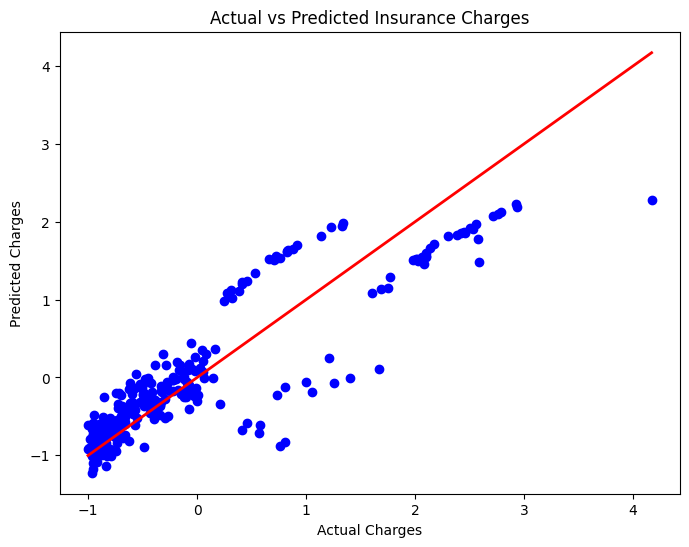

In [151]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Insurance Charges')
plt.show()

Model2  LogisticRegression

In [152]:
data = pd.get_dummies(data, drop_first=True)

In [153]:
data

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,-0.908614,0.298584,False,True,False,False,True
1,-1.509965,0.509621,-0.078767,-0.953689,True,False,False,True,False
2,-0.797954,0.383307,1.580926,-0.728675,True,False,False,True,False
3,-0.441948,-1.305531,-0.908614,0.719843,True,False,True,False,False
4,-0.513149,-0.292556,-0.908614,-0.776802,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...
1333,0.768473,0.050297,1.580926,-0.220551,True,False,True,False,False
1334,-1.509965,0.206139,-0.908614,-0.914002,False,False,False,False,False
1335,-1.509965,1.014878,-0.908614,-0.961596,False,False,False,True,False
1336,-1.296362,-0.797813,-0.908614,-0.930362,False,False,False,False,True


In [154]:
median_charges = data['charges'].median()
data['high_charges'] = (data['charges'] > median_charges).astype(int)

In [155]:
median_charges

np.float64(-0.32120887952784083)

In [156]:
scaler = StandardScaler()
data[['age', 'bmi', 'children']] = scaler.fit_transform(data[['age', 'bmi', 'children']])

In [157]:
X = data.drop('high_charges', axis=1)  # Features
y = data['high_charges']

In [158]:
X

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,-0.908614,0.298584,False,True,False,False,True
1,-1.509965,0.509621,-0.078767,-0.953689,True,False,False,True,False
2,-0.797954,0.383307,1.580926,-0.728675,True,False,False,True,False
3,-0.441948,-1.305531,-0.908614,0.719843,True,False,True,False,False
4,-0.513149,-0.292556,-0.908614,-0.776802,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...
1333,0.768473,0.050297,1.580926,-0.220551,True,False,True,False,False
1334,-1.509965,0.206139,-0.908614,-0.914002,False,False,False,False,False
1335,-1.509965,1.014878,-0.908614,-0.961596,False,False,False,True,False
1336,-1.296362,-0.797813,-0.908614,-0.930362,False,False,False,False,True


In [159]:
y

0       1
1       0
2       0
3       1
4       0
       ..
1333    1
1334    0
1335    0
1336    0
1337    1
Name: high_charges, Length: 1338, dtype: int64

In [160]:
X_train,X_test,y_train,y_test =train_test_split(X,y,train_size=0.75,random_state=25)

In [161]:
X_train.shape

(1003, 9)

In [162]:
X_test.shape

(335, 9)

In [163]:
y_test

748    0
633    0
651    1
411    1
502    1
      ..
484    1
979    0
855    0
236    0
527    1
Name: high_charges, Length: 335, dtype: int64

In [164]:
y_train

446     1
686     0
128     1
705     0
567     0
       ..
886     1
143     1
474     1
318     0
1156    1
Name: high_charges, Length: 1003, dtype: int64

In [165]:
model2 = LogisticRegression(random_state=42)

In [166]:
model2.fit(X_train,y_train)

LogisticRegression(random_state=42)

In [167]:
y_pred = model2.predict(X_test)

In [168]:
y_pred

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,

In [169]:
accuracy = accuracy_score(y_test, y_pred)

In [170]:
accuracy

0.982089552238806

In [171]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       174
           1       0.98      0.98      0.98       161

    accuracy                           0.98       335
   macro avg       0.98      0.98      0.98       335
weighted avg       0.98      0.98      0.98       335



In [172]:
confusion_matrix(y_test, y_pred)

array([[171,   3],
       [  3, 158]])

MODEL3 KNN

In [173]:
df=pd.read_csv(r"C:\Users\DELL\Downloads\insurance.csv")

In [174]:
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])  
df['smoker'] = le.fit_transform(df['smoker'])  
df['region'] = le.fit_transform(df['region'])

In [175]:
median_charge = df['charges'].median()
df['high_charge'] = (df['charges'] > median_charge).astype(int)


In [176]:
X = df.drop(['charges', 'high_charge'], axis=1)
y = df['high_charge']

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [178]:
scaler = StandardScaler()

In [179]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [180]:
X_test_scaled 

array([[ 0.40114007, -1.0246016 , -0.89153925,  0.73433626, -0.50874702,
        -1.35325561],
       [-0.23863782, -1.0246016 , -0.08946143, -0.91119211, -0.50874702,
        -0.45611589],
       [ 1.75178229, -1.0246016 , -0.60845296, -0.91119211,  1.96561348,
        -0.45611589],
       ...,
       [-0.09646495,  0.97598911, -0.41972876, -0.08842793, -0.50874702,
        -1.35325561],
       [ 1.04091797, -1.0246016 ,  2.78941026, -0.91119211,  1.96561348,
         0.44102382],
       [ 0.82765867, -1.0246016 ,  0.60252728, -0.08842793, -0.50874702,
         1.33816354]])

In [181]:
X_train_scaled

array([[ 0.47222651, -1.0246016 , -1.75652513,  0.73433626, -0.50874702,
        -0.45611589],
       [ 0.54331294, -1.0246016 , -1.03308239, -0.91119211, -0.50874702,
        -1.35325561],
       [ 0.8987451 , -1.0246016 , -0.94368672, -0.91119211, -0.50874702,
         0.44102382],
       ...,
       [ 1.3252637 ,  0.97598911, -0.89153925, -0.91119211, -0.50874702,
        -1.35325561],
       [-0.16755139, -1.0246016 ,  2.82086429,  0.73433626,  1.96561348,
         1.33816354],
       [ 1.1120044 ,  0.97598911, -0.10932713, -0.91119211, -0.50874702,
         1.33816354]])

In [182]:
knn = KNeighborsClassifier(n_neighbors=5)

In [183]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [184]:
y_pred = knn.predict(X_test_scaled)

In [185]:
accuracy = accuracy_score(y_test, y_pred)

In [186]:
accuracy

0.9067164179104478

In [187]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91       146
           1       0.88      0.92      0.90       122

    accuracy                           0.91       268
   macro avg       0.91      0.91      0.91       268
weighted avg       0.91      0.91      0.91       268



In [188]:
cof=confusion_matrix(y_test, y_pred)

In [189]:
cof

array([[131,  15],
       [ 10, 112]])

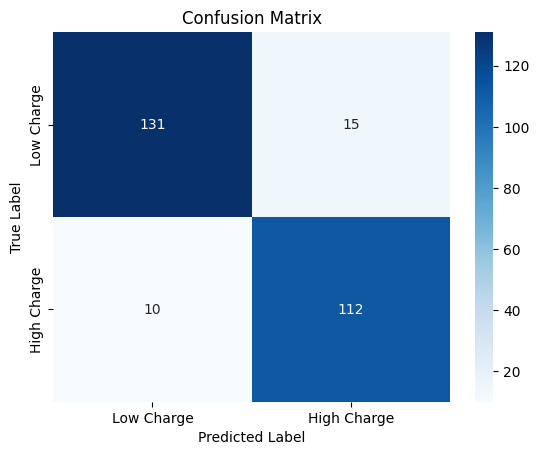

In [190]:
sns.heatmap(cof, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Charge', 'High Charge'], yticklabels=['Low Charge', 'High Charge'])
plt.title("Confusion Matrix")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


MODEL4 DECISION TREE

In [191]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.25, random_state=452)

In [192]:
scaler = StandardScaler()

In [193]:
scaler.fit(X_tr)

StandardScaler()

In [194]:
scaled_train = scaler.transform(X_tr)

In [195]:
scaled_train

array([[-0.65563832, -1.02320026,  0.05898372,  1.57342704, -0.51305378,
         1.30766353],
       [ 0.21067662,  0.97732579,  0.11681031, -0.91445628, -0.51305378,
        -0.47559483],
       [-0.00590211,  0.97732579, -0.36453497, -0.08516184,  1.9491134 ,
         1.30766353],
       ...,
       [ 0.6438341 ,  0.97732579,  0.61281586,  1.57342704, -0.51305378,
         1.30766353],
       [ 1.07699157, -1.02320026,  2.74832741, -0.91445628,  1.9491134 ,
         0.41603435],
       [ 0.21067662,  0.97732579, -0.59258349, -0.91445628, -0.51305378,
         1.30766353]])

In [196]:
scaled_test=scaler.transform(X_te)

In [197]:
scaled_test

array([[ 0.57164118,  0.97732579,  1.36863383,  0.7441326 ,  1.9491134 ,
         0.41603435],
       [-1.52195326,  0.97732579, -1.42658953,  0.7441326 , -0.51305378,
         0.41603435],
       [-1.44976035,  0.97732579, -1.64730793, -0.91445628, -0.51305378,
        -0.47559483],
       ...,
       [ 0.0662908 ,  0.97732579,  0.36440586, -0.08516184,  1.9491134 ,
        -1.367224  ],
       [ 0.42725536, -1.02320026,  0.85959694, -0.91445628, -0.51305378,
        -0.47559483],
       [ 0.86041283,  0.97732579,  1.4924316 , -0.08516184, -0.51305378,
         1.30766353]])

In [198]:
dtree = DecisionTreeClassifier(random_state=42)

In [199]:
dtree.fit(scaled_train, y_tr)

DecisionTreeClassifier(random_state=42)

In [200]:
y_pred = dtree.predict(X_test_scaled)

In [201]:
accuracy = accuracy_score(y_test, y_pred)

In [202]:
accuracy

0.9440298507462687

In [203]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95       146
           1       0.91      0.98      0.94       122

    accuracy                           0.94       268
   macro avg       0.94      0.95      0.94       268
weighted avg       0.95      0.94      0.94       268



In [204]:
conf= confusion_matrix(y_test, y_pred)

In [205]:
conf

array([[134,  12],
       [  3, 119]])

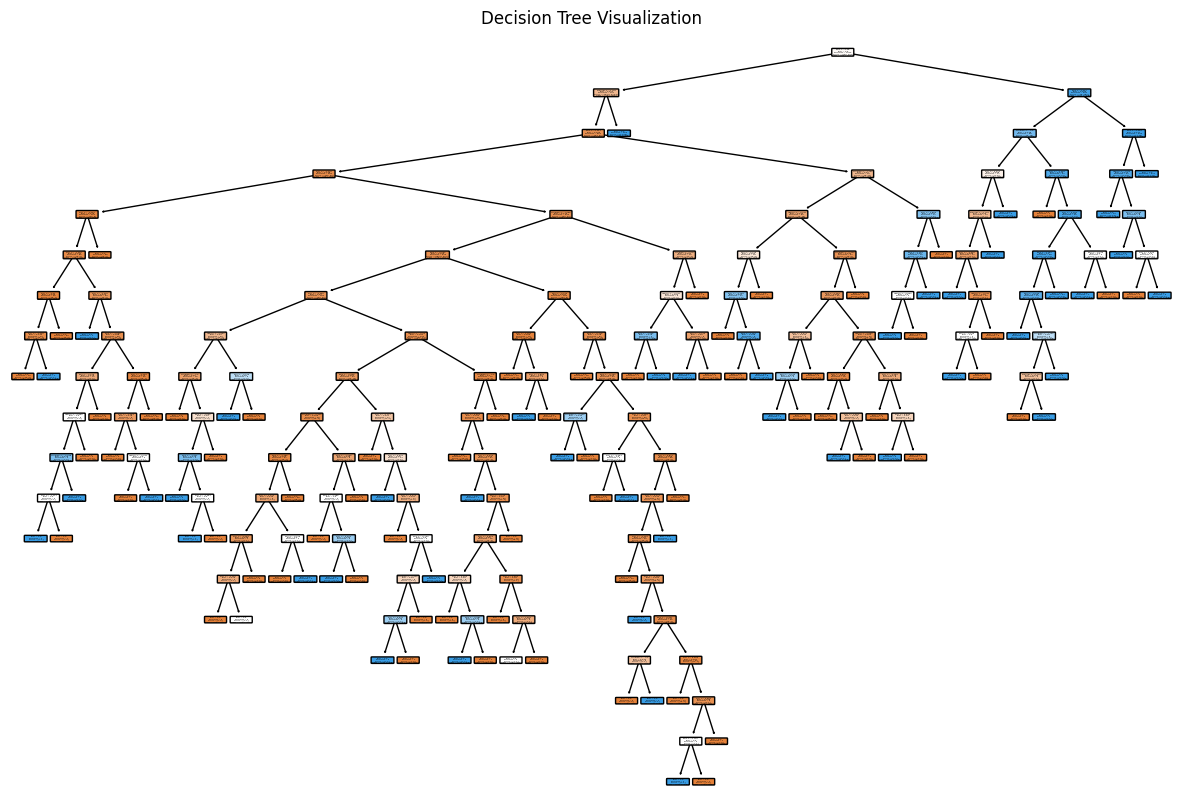

In [206]:
plt.figure(figsize=(15, 10))
plot_tree(dtree, filled=True, feature_names=X.columns, class_names=['Low Charge', 'High Charge'], rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

In [207]:
model2 = DecisionTreeClassifier(max_depth=8)

In [208]:
model2.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=8)

In [209]:
training_acc = model2.score(scaled_train, y_tr)
testing_acc = accuracy_score(y_te, model2.predict(scaled_test))

training_acc, testing_acc

(0.9471585244267199, 0.9432835820895522)

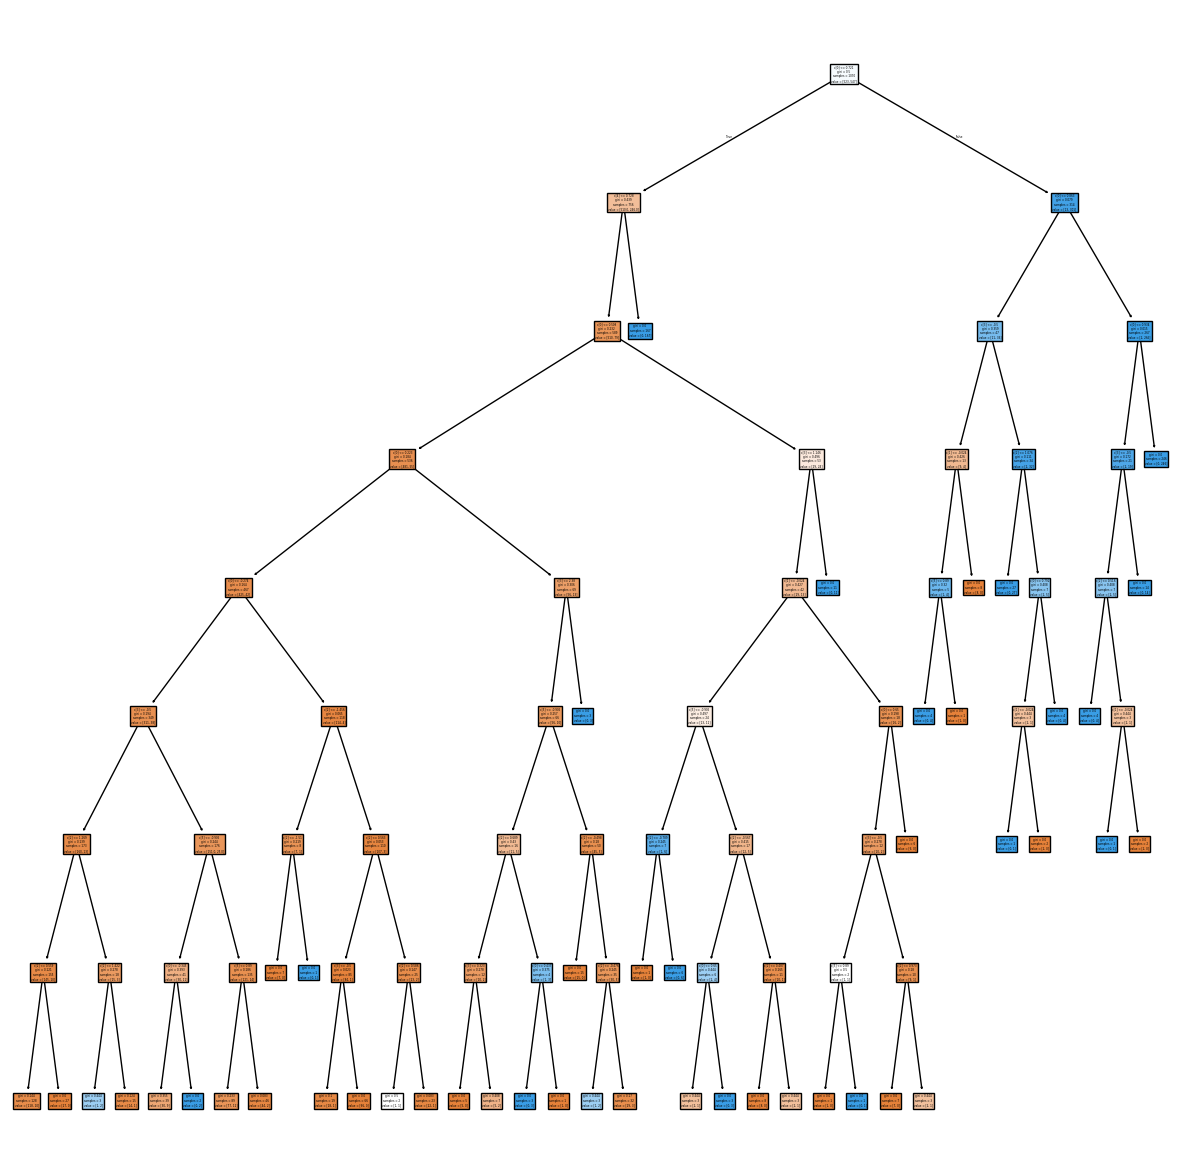

In [210]:
plt.figure(figsize=(15,15))
plot_tree(model2,filled=True)
plt.show()

In [211]:
model3=DecisionTreeClassifier(max_depth=4,max_features=5)

In [212]:
model3.fit(scaled_train,y_tr)

DecisionTreeClassifier(max_depth=4, max_features=5)

In [213]:
training_acc=model3.score(scaled_train,y_tr)
testing_acc=accuracy_score(y_te,model3.predict(scaled_test))
training_acc,testing_acc

(0.93419740777667, 0.9104477611940298)

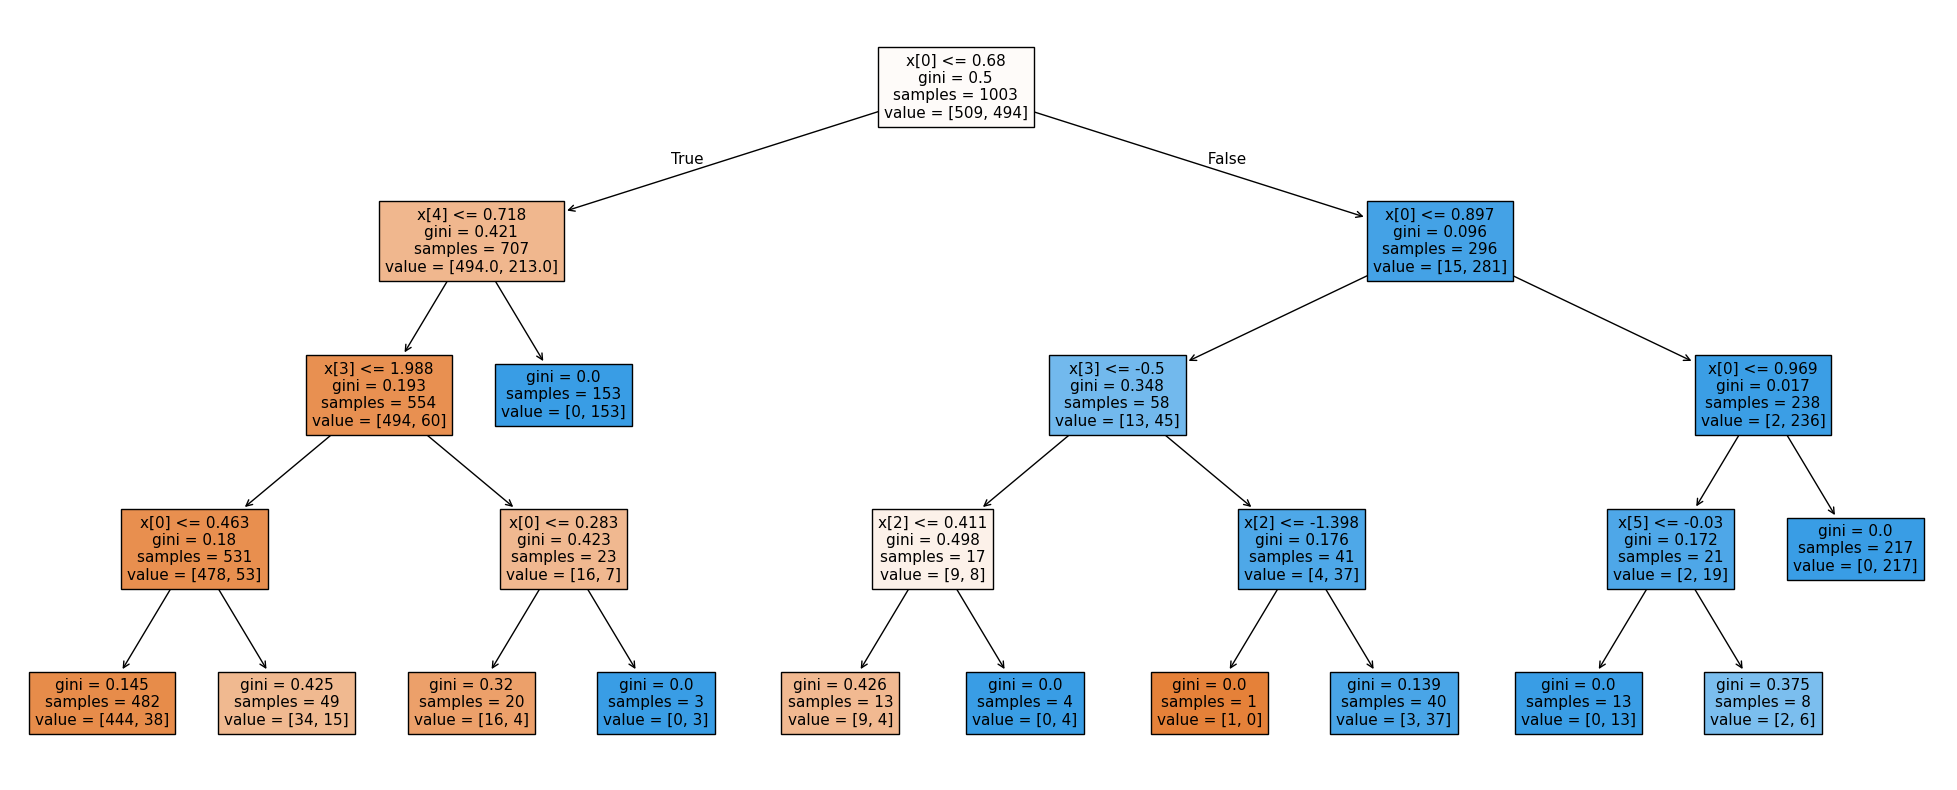

In [214]:
plt.figure(figsize=(25,10))
plot_tree(model3,filled=True)
plt.show()

In [215]:
y_pr3=model3.predict(scaled_test)

In [216]:
print(classification_report(y_te,y_pr3))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       160
           1       0.94      0.89      0.91       175

    accuracy                           0.91       335
   macro avg       0.91      0.91      0.91       335
weighted avg       0.91      0.91      0.91       335



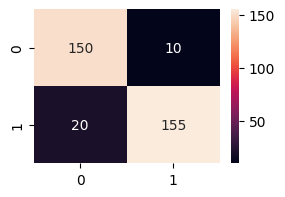

In [217]:
plt.figure(figsize=(3,2))
sns.heatmap(confusion_matrix(y_te,y_pr3),annot=True,fmt="d")
plt.show()

MODEL5 NAIVE BAYES CLASSIFIER

In [218]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [219]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [220]:
nb=GaussianNB()

In [221]:
nb.fit(X_train,y_train)

GaussianNB()

In [222]:
y_pred=nb.predict(X_test)

In [223]:
y_pred[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [224]:
accuracy_score(y_test,y_pred)

0.4552238805970149

In [225]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       146
           1       0.46      1.00      0.63       122

    accuracy                           0.46       268
   macro avg       0.23      0.50      0.31       268
weighted avg       0.21      0.46      0.28       268



In [226]:
confusion_matrix(y_test,y_pred)

array([[  0, 146],
       [  0, 122]])

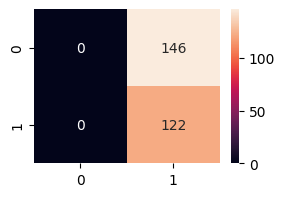

In [227]:
plt.figure(figsize=(3,2))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d")
plt.show()

MODEL6 RANDOM FOREST

In [228]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [229]:
X_train.shape

(1070, 6)

In [230]:
X_test.shape

(268, 6)

In [231]:
scaled=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

In [232]:
randomf = RandomForestClassifier(n_estimators=100, random_state=42)

In [233]:
randomf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [234]:
y_pred=randomf.predict(X_test)

In [235]:
y_pred

array([0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1])

In [236]:
accuracy_score(y_test,y_pred)

0.9365671641791045

In [237]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       146
           1       0.96      0.90      0.93       122

    accuracy                           0.94       268
   macro avg       0.94      0.93      0.94       268
weighted avg       0.94      0.94      0.94       268



In [238]:
conf_matrix=confusion_matrix(y_test,y_pred)

In [239]:
conf_matrix

array([[141,   5],
       [ 12, 110]])

<Axes: >

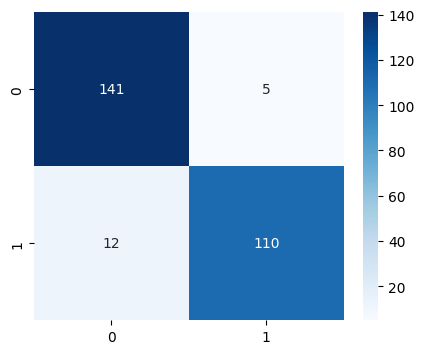

In [240]:
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues')


Conclusion : After testing several models, the Random Forest model is the best for predicting whether a person has high or low insurance charges. It gave the best results in terms of accuracy and other important measures like precision and recall.

Random Forest is a strong model because it combines many decision trees, which helps it make better predictions and avoid mistakes. This makes it the most reliable choice for this problem.